In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

(99, 1)
(99, 1)


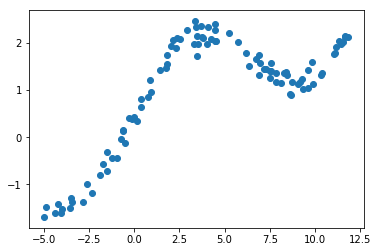

In [3]:
X = dfx.values
Y = dfy.values
print(X.shape)
print(Y.shape)
plt.scatter(X,Y)

In [4]:
u = X.mean()
st = X.std()


X = (X-u)/st
plt.style.use('seaborn')

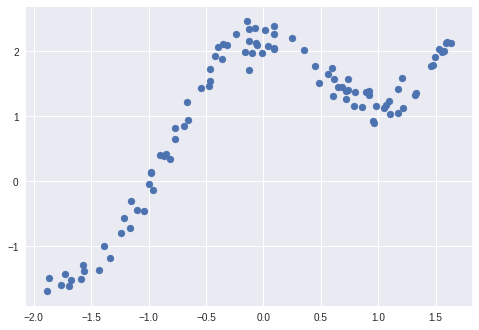

In [5]:
plt.scatter(X,Y)
plt.show()

In [8]:
np.eye(5)# A diagonal matrix 

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [16]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp((np.dot((xi-x),(xi-x).T))/(-2*tau*tau))
    
    return W
        

In [22]:
X = np.mat(X)
Y = np.mat(Y)

m = X.shape[0]
W = getW(-1,X,0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


In [80]:
def predict(X,Y,query_x,tau):
    ones = np.ones((m,1))
    X_ = np.hstack([X,ones])
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = (X',WX)inv * (X'WY)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [81]:
theta,pred = predict(X,Y,1.0,1.0) 
print(theta)

[[0.14069504]
 [1.45348191]]


In [82]:
print(pred)

[[1.59417694]]


In [86]:
def plotprediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    y_test = np.array(Y_test)
    
    X0 = np.array(X)
    Y0 = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

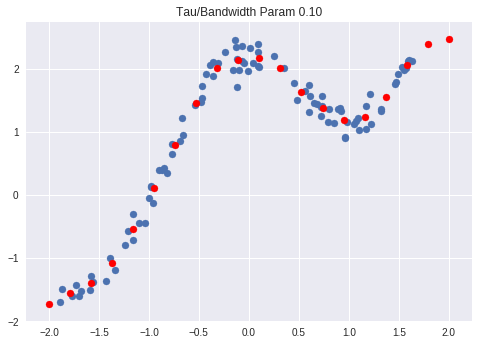

In [87]:
plotprediction(0.1)

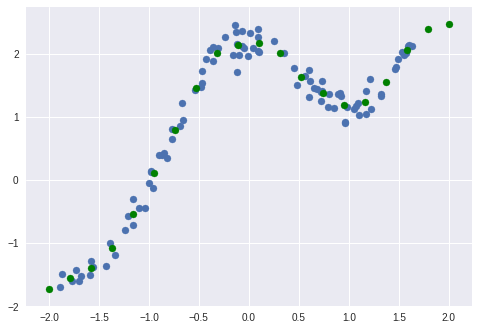

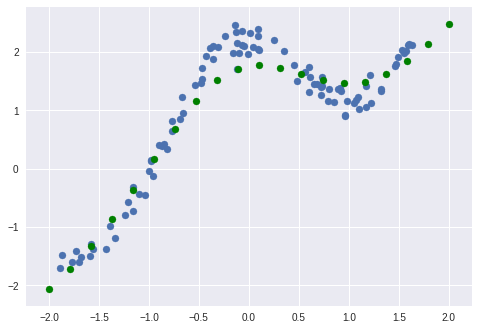

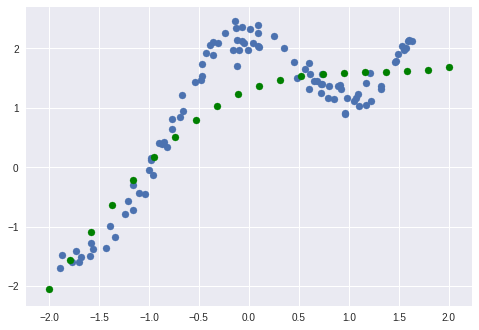

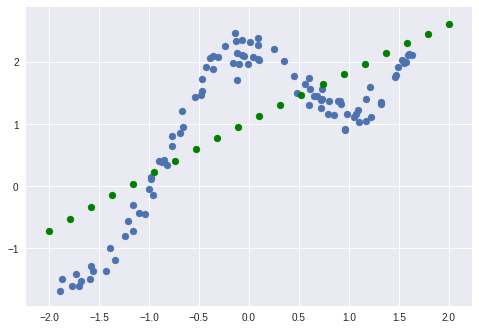

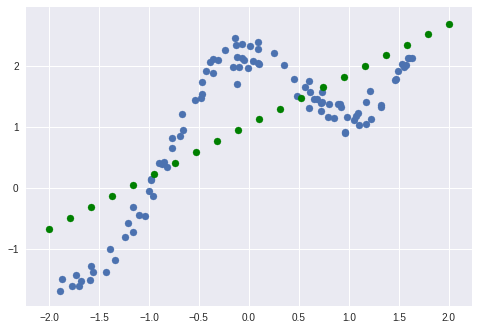

In [88]:
taus = [0.1,0.5,1,5,10]

for i in taus:
    plotpredcition(i)
    